In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

pd.set_option('display.max_rows', 50)
pd.set_option("display.max_columns", 50)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [2]:
X_original = pd.read_csv("train.csv")
X = X_original[["GrLivArea", "YearBuilt"]]
y = X_original["SalePrice"]

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### 分析

**目的変数となる住宅価格の分布を確認**

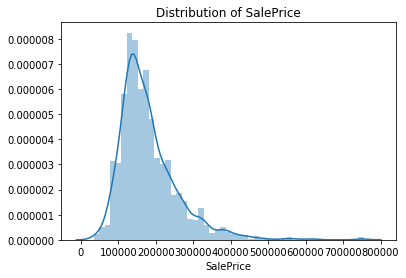

In [3]:
sns.distplot(y)
plt.title("Distribution of SalePrice")
plt.show()

* 住宅の分布は100000～200000付近に多く、右に裾が長い分布

**特徴量の分布と特徴量同士の相関を確認**

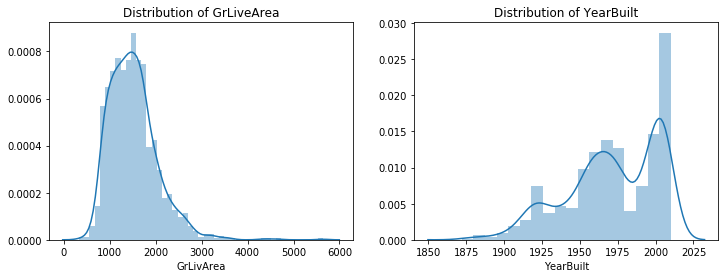

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(X["GrLivArea"], ax=ax1)
ax1.set_title("Distribution of GrLiveArea")
sns.distplot(X["YearBuilt"], ax=ax2)
ax2.set_title("Distribution of YearBuilt")
plt.show()

* リビング面積は1000ft～2000ftの間が多く、右に裾が長い分布をしている
* 住宅は1950年以降のものが多い

In [5]:
cormat = X.corr()
cormat

,GrLivArea,YearBuilt
GrLivArea,1.00000,0.19901
YearBuilt,0.19901,1.00000


特徴量同士の相関はほとんどないといえる

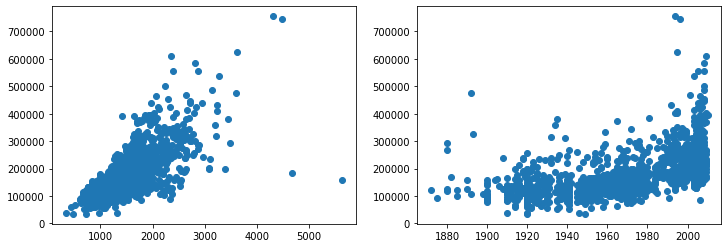

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.scatter(X["GrLivArea"], y)
ax2.scatter(X["YearBuilt"], y)
plt.show()

GrLivArea：リビング面積が広いほど、住宅価格が比例して上昇する傾向がみられる。ただし一部外れ値もあるので注意  
YearBuilt：建築日が最近に近ければ価格は高い傾向にある。2字曲線的なカーブが描ける。一部、昔の建築で高価な住宅もある 

### 前処理

**欠損処理**

In [7]:
X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

欠損はないので特に手を加える必要はなさそう

**訓練データと検証データの作成　７：３にわける**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**特徴量の正規化**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### 線形回帰による学習

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 推定・可視化

In [11]:
pred = lr.predict(X_test)

### 評価

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("MSE： %.2f" % rmse)

eval_table = pd.DataFrame([rmse], index=["LinearRegression"], columns=["MSE"])

MSE： 45220.95


### 可視化

In [13]:
def plot_model(X, y, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

    ax1.scatter(X[:, 0], y, alpha=0.7)
    ax1.grid()
    ax1.scatter(X[:, 0], model.predict(X), alpha=0.7)
    ax1.set_xlabel("GrLivArea")
    ax1.set_ylabel("Target")
    ax1.set_title("{} $(x=GrLivArea)$".format(model.__class__.__name__))

    ax2.scatter(X[:, 1], y, label="y_true", alpha=0.7)
    ax2.grid()
    ax2.scatter(X[:, 1], model.predict(X), label="model", alpha=0.7)
    ax2.set_xlabel("YearBuilt")
    ax2.set_ylabel("Target")
    ax2.set_title("{} $(x=YearBuilt)$".format(model.__class__.__name__))

    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

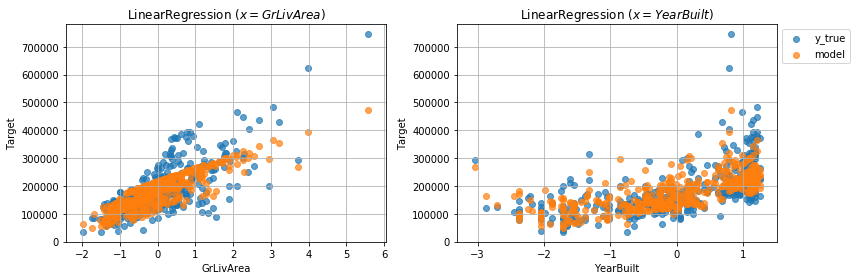

In [14]:
plot_model(X_test, y_test, lr)

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。  
そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。  
どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

* 線形回帰
* SVM
* 決定木
* ランダムフォレスト

### 線形回帰

問題１～２で行った通り

### SVM

In [15]:
svr = SVR()
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, pred))

In [17]:
eval_table = eval_table.append(pd.DataFrame([rmse], index=["SVM"], columns=["MSE"]))

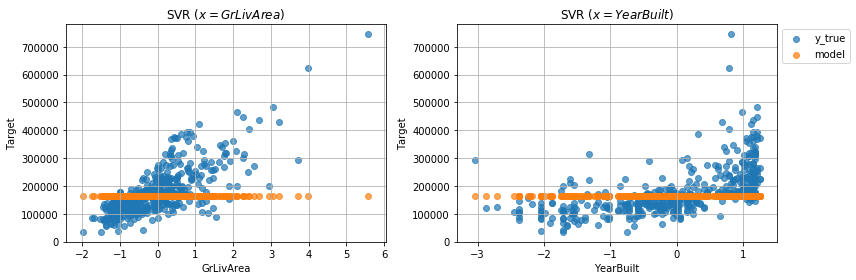

In [18]:
plot_model(X_test, y_test, svr)

### 決定木

In [19]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, pred))

In [21]:
eval_table = eval_table.append(pd.DataFrame([rmse], index=["DecisionTree"], columns=["MSE"]))

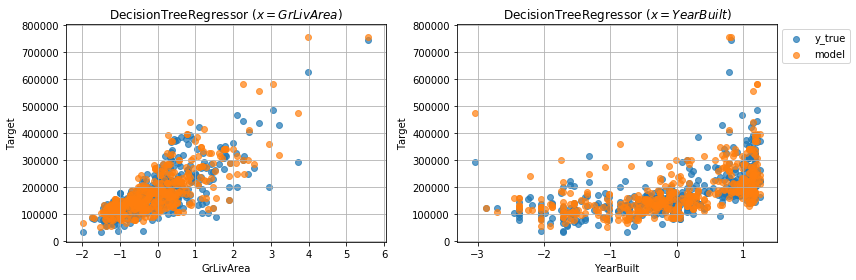

In [22]:
plot_model(X_test, y_test, tree)

### ランダムフォレスト

In [23]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
eval_table = eval_table.append(pd.DataFrame([rmse], index=["RandomForest"], columns=["MSE"]))

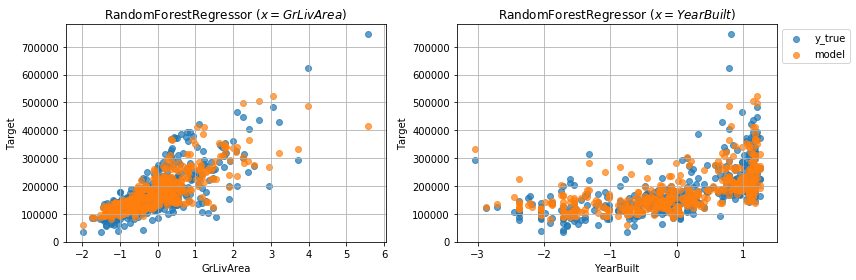

In [25]:
plot_model(X_test, y_test, rfr)

In [26]:
eval_table

,MSE
LinearRegression,45220.949222
SVM,85951.701760
DecisionTree,53352.228302
RandomForest,53352.228302


**(考察)**

パラメータチューニングを行わずにデフォルトパラメータで各モデルの性能を比較したところ、
線形回帰モデルを使った住宅価格予測が最も精度の高いモデルであった。

各モデルで予測した住宅価格と実際のターゲットを可視化した図を見ると以下のことが考えられる。

* 線形回帰　　　　　：分布の高い値の域においては高い精度で予測できるが、外れ値に弱い。評価関数RMSEの値も外れ値との誤差の影響が大きい  
* SVM　　　　　　　 ：可視化したところ、実際値とかなりズレのある図になったが、原因は不明。パラメータの影響か？  
* 決定木　 　　　　 ：それなりに良い精度が出る。外れ値に大しても近い予測値が出ている  
* ランダムフォレスト：それなりに良い精度が出る。外れ値に大しても近い予測値が出ている。パラメータを変えないと決定木と同じか？

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。

どう選択・加工するかにはデータ分析が重要になってきます。

### 特徴量抽出

#### まずは欠損処理

In [27]:
X_original = pd.read_csv("train.csv")

total = X_original.isnull().sum()
percent = X_original.isnull().sum() / len(X_original)
missing_table = pd.concat([total, percent], axis=1, keys=["total", "percent"])
display(missing_table[missing_table["percent"] > 0].sort_values(by="percent", ascending=False))

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [28]:
drop_cols = missing_table[missing_table["total"] > 10].index
X_original = X_original.drop(columns=drop_cols, axis=1)
X_original = X_original.dropna()
X_original.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 65, dtype: int64

#### 数値型の特徴量とカテゴリ型の特徴量とそれぞれで目的変数との相関を観察する

In [29]:
numerical_feats = X_original.dtypes[X_original.dtypes != "object"].index
categorical_feats = X_original.dtypes[X_original.dtypes == "object"].index

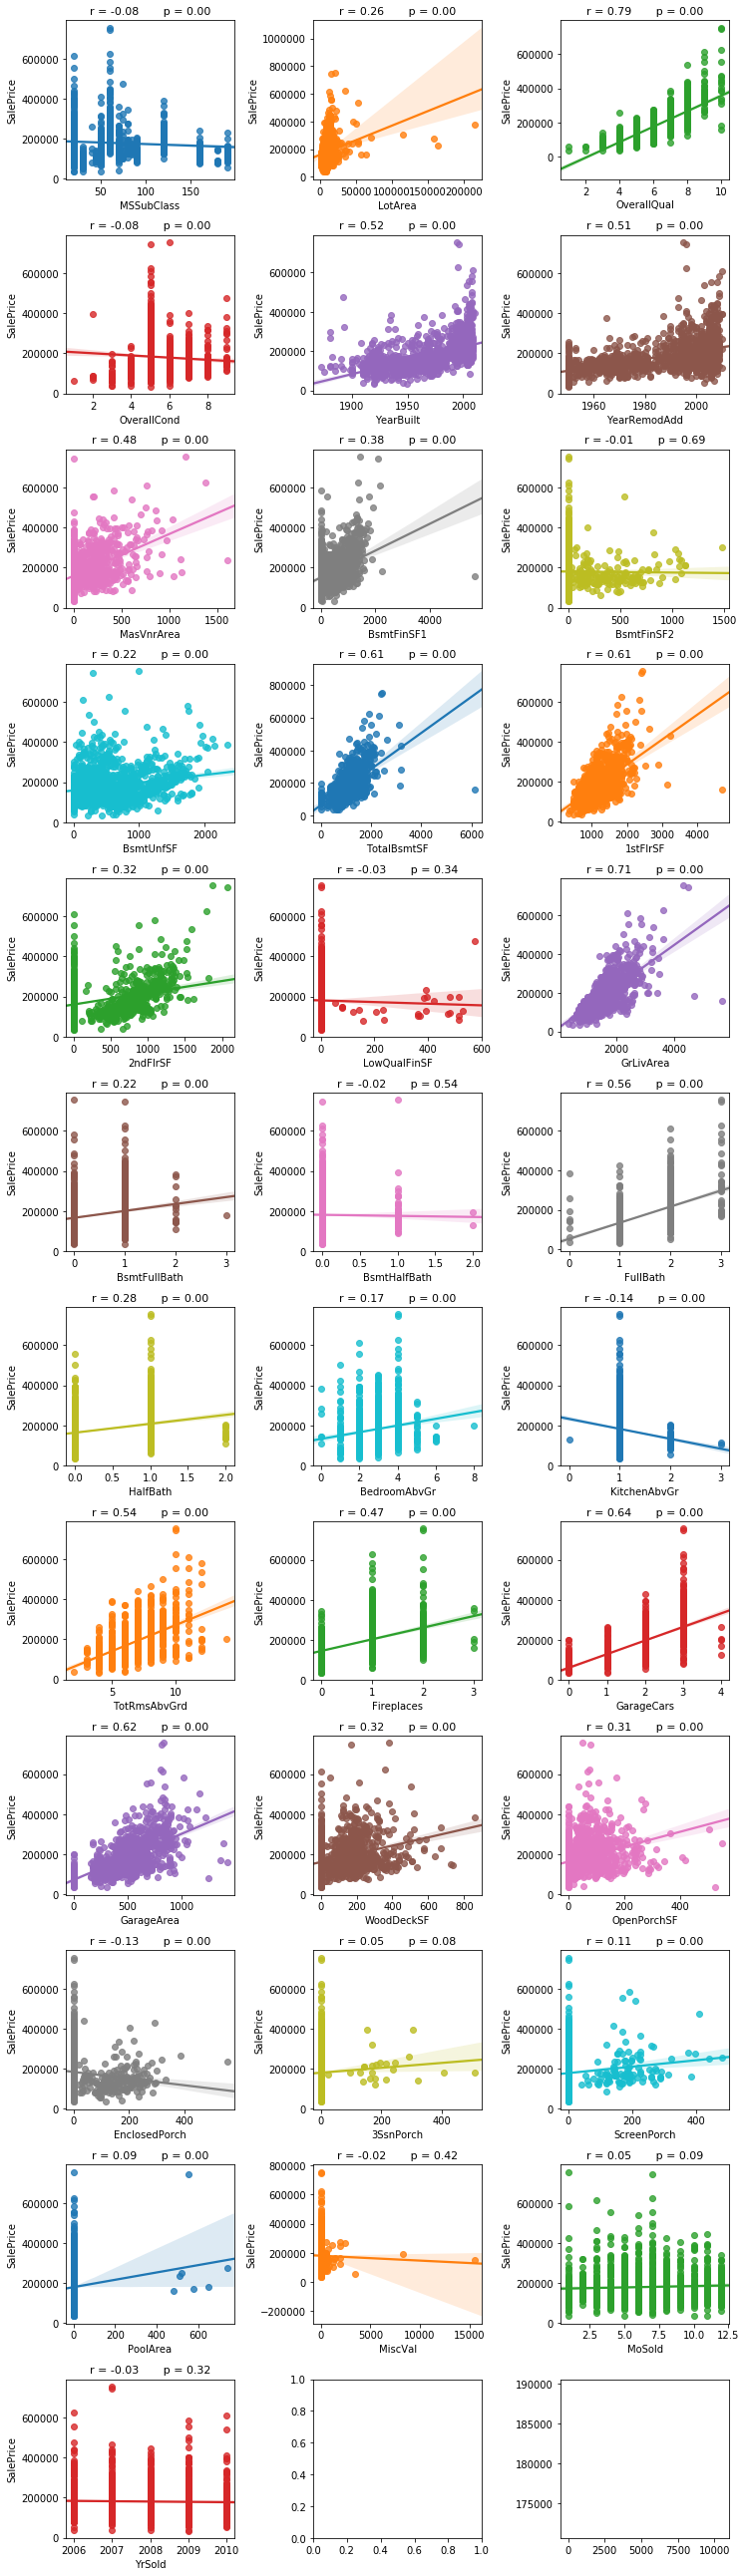

In [30]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ["Id", "SalePrice"]
li_plot_num_feats = [c for c in li_num_feats if c not in li_not_plot]

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r * nr_cols + c
        if i < len(li_plot_num_feats):
            sns.regplot(X_original[li_plot_num_feats[i]], X_original["SalePrice"], ax = axs[r][c])
            stp = stats.pearsonr(X_original[li_plot_num_feats[i]], X_original["SalePrice"])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "       " + "p = " + "{:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)

plt.tight_layout()
plt.show()

上図より相関係数0.6以上の特徴はなんか使えそう。。

In [31]:
miv_val_corr = 0.6

corr = X_original.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, "SalePrice")["SalePrice"]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > miv_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= miv_val_corr].index)

カテゴリ変数についても相関をみていく

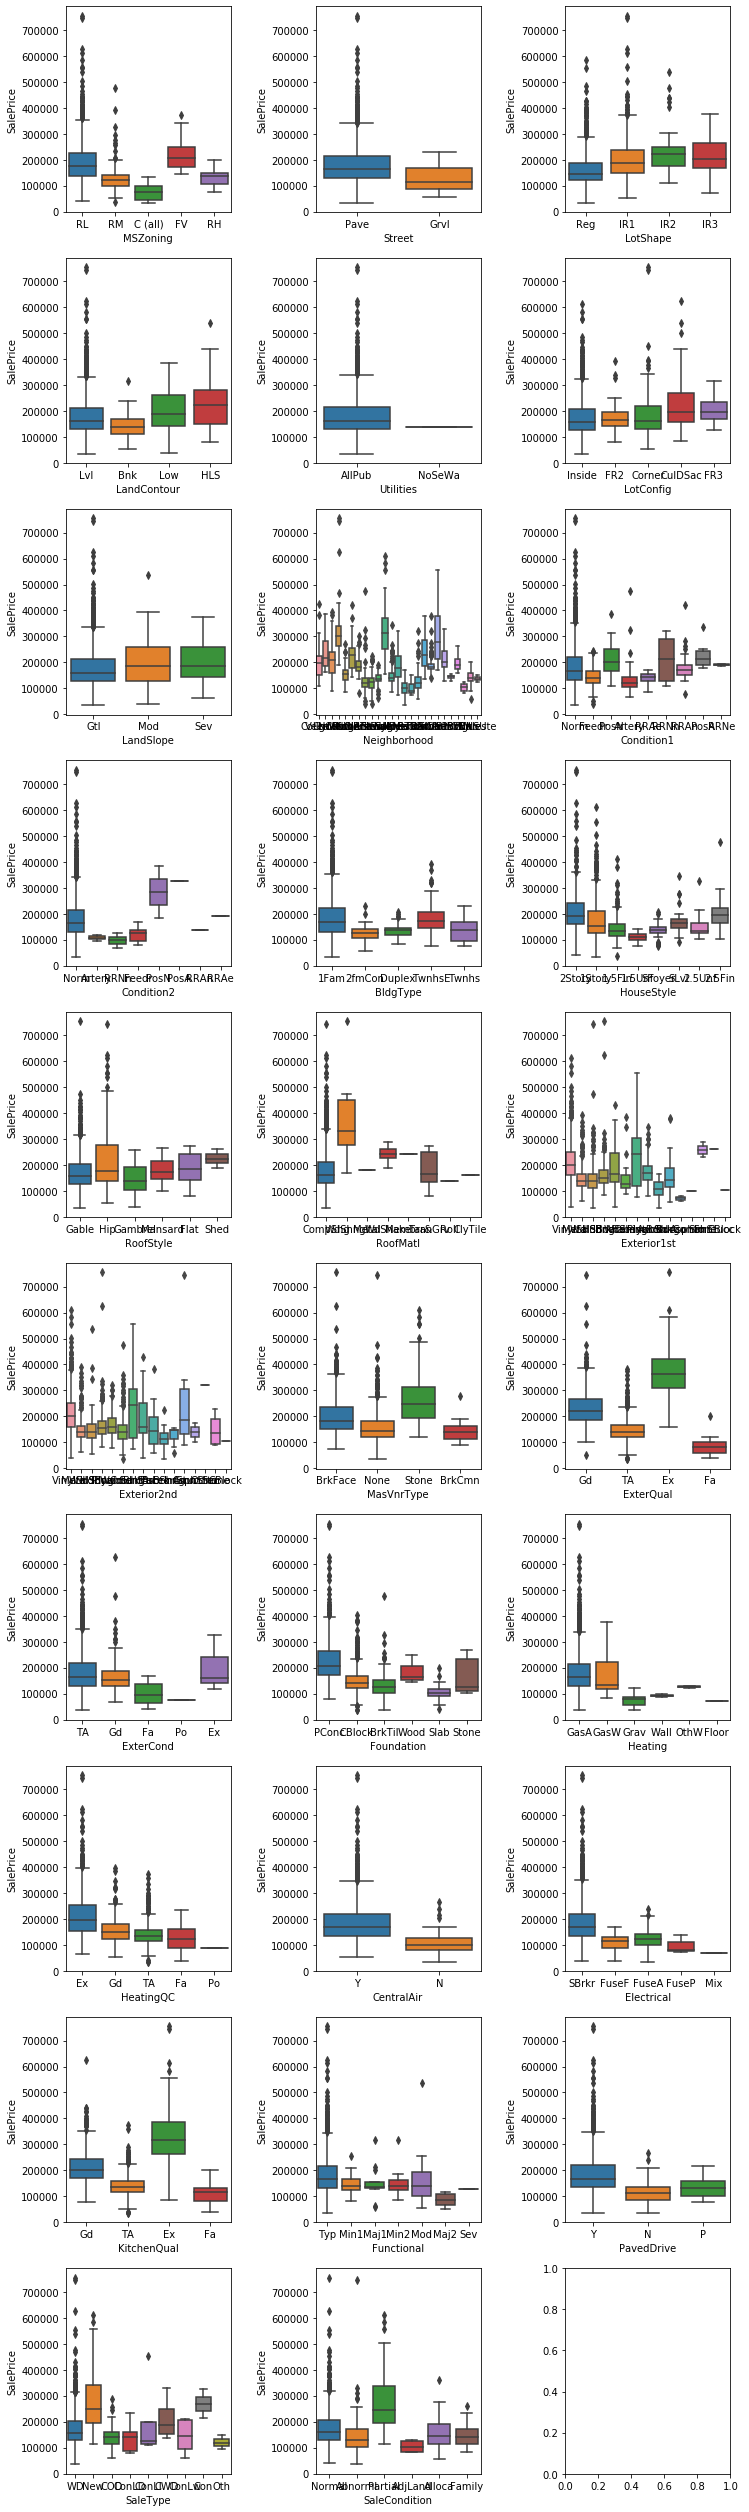

In [32]:
li_cat_feats = list(categorical_feats)

nr_rows = 10
nr_cols = 3

fig, axs= plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3.5))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y="SalePrice",data=X_original, ax=axs[r][c])
            
plt.tight_layout()
plt.show()

強い相関がみられる特徴量についてピックアップする

In [33]:
catg_strong_corr_feats = ['MSZoning', 'ExterQual', 'Foundation','CentralAir', 'KitchenQual', 'SaleType']

相関の強い特徴量をまとめ、特徴量間の相関を観察し削除できる特徴量がないか確認する

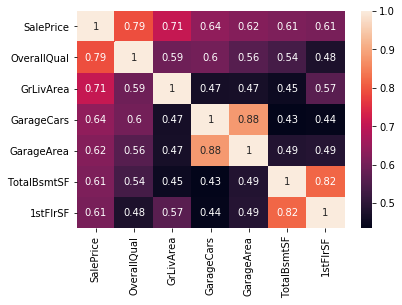

In [34]:
strong_feats = cols_abv_corr_limit + catg_strong_corr_feats
corrmat = X_original[strong_feats].corr()
sns.heatmap(corrmat, annot=True)
plt.ylim(len(corrmat), 0)
plt.show()

GarageCarsとGarageArea、TotalBsmtSFと1stFlrSFは互いに相関が強いため削除する

In [35]:
strong_feats.remove("GarageArea")
strong_feats.remove("1stFlrSF")
strong_feats.remove("SalePrice")

### 学習

In [36]:
X = X_original[strong_feats]
y = X_original["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

前処理

In [37]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

**線形回帰**

In [38]:
from sklearn.compose import TransformedTargetRegressor

# lr = LinearRegression()
lr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp) #対数変換してみる
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE：%.2f" % rmse)

eval_table = eval_table.append(pd.DataFrame([rmse], index=["LinearRegression(increase features)"], columns=["MSE"]))
eval_table

RMSE：26352.92


,MSE
LinearRegression,45220.949222
SVM,85951.701760
DecisionTree,53352.228302
RandomForest,53352.228302
LinearRegression(increase features),26352.915019


SVM

In [39]:
svr = SVR()
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE：%.2f" % rmse)

eval_table = eval_table.append(pd.DataFrame([rmse], index=["SVM(increase features)"], columns=["MSE"]))
eval_table

C:\Users\syous\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE：76684.46


,MSE
LinearRegression,45220.949222
SVM,85951.701760
DecisionTree,53352.228302
RandomForest,53352.228302
LinearRegression(increase features),26352.915019
SVM(increase features),76684.464171


決定木

In [40]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE：%.2f" % rmse)

eval_table = eval_table.append(pd.DataFrame([rmse], index=["DecisionTree(increase features)"], columns=["MSE"]))
eval_table

RMSE：39351.50


,MSE
LinearRegression,45220.949222
SVM,85951.701760
DecisionTree,53352.228302
RandomForest,53352.228302
LinearRegression(increase features),26352.915019
SVM(increase features),76684.464171
DecisionTree(increase features),39351.499796


ランダムフォレスト

In [41]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE：%.2f" % rmse)

eval_table = eval_table.append(pd.DataFrame([rmse], index=["RandomForest(increase features)"], columns=["MSE"]))
eval_table

RMSE：27524.77


C:\Users\syous\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MSE
LinearRegression,45220.949222
SVM,85951.701760
DecisionTree,53352.228302
RandomForest,53352.228302
LinearRegression(increase features),26352.915019
SVM(increase features),76684.464171
DecisionTree(increase features),39351.499796
RandomForest(increase features),27524.772609


**(検証結果)**

意味のある特徴量を増やして学習を行うと大きく精度があがることが立証された。  
SVMの精度が他と比べてかなり低いのはパラメータ設定にあるのか？それとも回帰問題に適さないモデルなのか？  
パラメータチューニングを行うことでもっと精度が高くなると思うので、更に発展としてチャレンジしていきたい

## 【自由研究】対数変換すると精度はあがるのか？

ターゲットも特徴量も分布が偏っているため対数変換し、正規分布に従わせることで外れ値の影響を小さくすれば精度はあがるのではないか？  
という疑問が沸いたので検証してみる
（動機が合っているか自信ない。。。考え方あってますか？）

In [42]:
from sklearn.compose import TransformedTargetRegressor

X = X_original[["GrLivArea", "YearBuilt"]]
y = X_original["SalePrice"]

#データセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = map(np.array, (X_train, X_test, y_train, y_test))

#対数変換した線形回帰モデル
lr_log = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp)
lr_log.fit(X_train, y_train)
pred = lr_log.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))

print("RMSE：%.2f" % rmse)

RMSE：38383.38


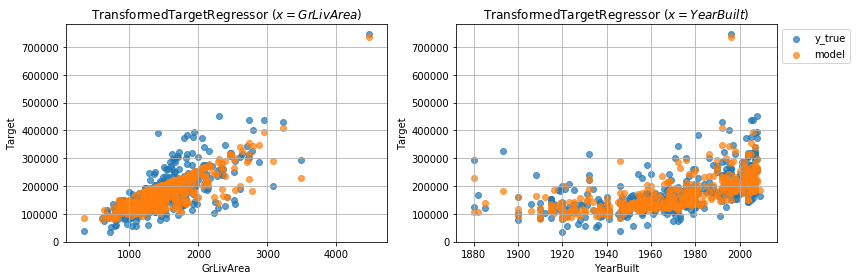

In [43]:
plot_model(X_test, y_test, lr_log)

予想通り外れ値への予測精度がよくなっていそう。RMSEの値もよくなっている

## せっかくなのでKaggleにSubmitしてみる

In [44]:
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [45]:
total = test.isnull().sum()

percent = test.isnull().sum() / len(X_original)
missing_table = pd.concat([total, percent], axis=1, keys=["total", "percent"])
display(missing_table[missing_table["percent"] > 0].sort_values(by="percent", ascending=False))

drop_cols = missing_table[missing_table["total"] > 10].index
test = test.drop(columns=drop_cols, axis=1)
test = test.fillna(method="ffill")

percent = test.isnull().sum() / len(X_original)
missing_table = pd.concat([total, percent], axis=1, keys=["total", "percent"])
display(missing_table[missing_table["percent"] > 0].sort_values(by="percent", ascending=False))


,total,percent
PoolQC,1456,1.003446
MiscFeature,1408,0.970365
Alley,1352,0.931771
Fence,1169,0.805651
FireplaceQu,730,0.503101
LotFrontage,227,0.156444
GarageCond,78,0.053756
GarageYrBlt,78,0.053756
GarageQual,78,0.053756
GarageFinish,78,0.053756


C:\Users\syous\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,total,percent


In [46]:
X_test = test[strong_feats]

In [47]:
X_test = pd.get_dummies(X_test)

In [48]:
pred = lr.predict(X_test)
sample["SalePrice"] = pred

In [49]:
sample.to_csv("submit_first_challenge.csv", index=None)